###### The purpose of the following analysis is to discover if there was a significant difference in healthcare returns during the period before covid, and the period after covid

In [1]:
#dependancies
import pandas as pd
from pathlib import Path
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import requests
import json
import pprint
import warnings
warnings.filterwarnings("ignore")

In [26]:
#reading csv 
healthcare_path = Path("../Resources/healthcare_returns_complete.csv")
healthcare_df = pd.read_csv(healthcare_path, encoding="utf-8")
healthcare_df.head()

,Unnamed: 0,Symbol,GICS sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,NVO,Health Care,Large cap,260652723120,1565762,59.343087,132.104259
1,1,REGN,Health Care,Large cap,86238124754,637527,0.771226,90.870368
2,2,VRTX,Health Care,Large cap,78348616645,1110826,194.195889,31.120592
3,3,SGEN,Health Care,Large cap,37002973603,1468401,114.216058,13.035440
4,4,BNTX,Health Care,Large cap,31469610717,637153,111.575757,320.195808


In [27]:
healthcare_df

,Unnamed: 0,Symbol,GICS sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,NVO,Health Care,Large cap,260652723120,1565762,59.343087,132.104259
1,1,REGN,Health Care,Large cap,86238124754,637527,0.771226,90.870368
2,2,VRTX,Health Care,Large cap,78348616645,1110826,194.195889,31.120592
3,3,SGEN,Health Care,Large cap,37002973603,1468401,114.216058,13.035440
4,4,BNTX,Health Care,Large cap,31469610717,637153,111.575757,320.195808
...,...,...,...,...,...,...,...,...
813,1267,ECOR,Health Care,Micro cap,20297686,21210,-91.777777,-83.937500
814,1268,EKSO,Health Care,Micro cap,19319354,26162,-90.049628,-80.650406
815,1269,MBOT,Health Care,Micro cap,16633031,24696,-88.469945,-71.278625
816,1272,NURO,Health Care,Micro cap,11297730,17334,-93.221154,-65.186917


In [30]:
#finding outlier (errenous data)
print(healthcare_df[healthcare_df['Return from 2017-2019 (Pre-Covid)'] == healthcare_df['Return from 2017-2019 (Pre-Covid)'].max()])


     Unnamed: 0 Symbol  GICS sector Market Cap Type  Market Cap  \
119         178   IMTX  Health Care       Small cap   516762149   

     Average Volume  Return from 2017-2019 (Pre-Covid)  \
119          212362                       207899.99702   

     Return from 2020-2022 (Post-Covid)  
119                          -16.249997  


In [32]:
#deleteing outlier
healthcare_df = healthcare_df.drop(healthcare_df.index[119])



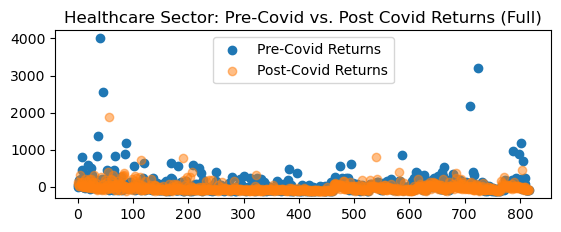

In [40]:
#scatter plot of data
plt.subplot(2, 1, 1)
plt.scatter(range(len(healthcare_df['Symbol'])), healthcare_df['Return from 2017-2019 (Pre-Covid)'], label="Pre-Covid Returns")
plt.scatter(range(len(healthcare_df['Symbol'])), healthcare_df['Return from 2020-2022 (Post-Covid)'], label="Post-Covid Returns", alpha = 0.5)
plt.legend()
plt.title('Healthcare Sector: Pre-Covid vs. Post Covid Returns (Full)')
plt.savefig("Healthcare_Scatter_Pre_vs_Post_Full.png")

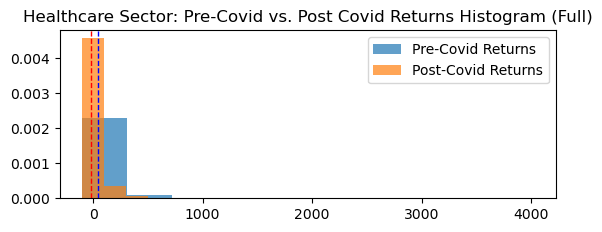

In [61]:
#plotting a histogram
plt.subplot(2, 1, 2)
plt.hist(healthcare_df['Return from 2017-2019 (Pre-Covid)'], 10, density=True, alpha=0.7, label="Pre-Covid Returns")
plt.hist(healthcare_df['Return from 2020-2022 (Post-Covid)'], 10, density=True, alpha=0.7, label="Post-Covid Returns")
plt.axvline(healthcare_df['Return from 2017-2019 (Pre-Covid)'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(healthcare_df['Return from 2020-2022 (Post-Covid)'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.legend()  
plt.title('Healthcare Sector: Pre-Covid vs. Post Covid Returns Histogram (Full)')
plt.savefig("Healthcare_Histogram_Pre_vs_Post_Full.png")

###### Histogram shows that data is highly positively skewed

###### Null Hypothesis: µ(returns of healthcare precovid) = µ(returns of healthcare post covid)


###### Alternative Hypothesis: µ(returns of healthcare precovid) ≠ µ(returns of healthcare post covid)

In [49]:
#running a two-sample t-test
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(healthcare_df['Return from 2017-2019 (Pre-Covid)'], healthcare_df['Return from 2020-2022 (Post-Covid)'], equal_var=False)

Ttest_indResult(statistic=6.118763711063338, pvalue=1.2961677176188562e-09)

##### The p value is ~0.00 which is significant at every level, therefore we can reject the null. The results imply that COVID-19 had a negative impact on the returns of healthcare sector.



In [55]:
#finding outliers for pre-covid returns
quartiles = healthcare_df['Return from 2017-2019 (Pre-Covid)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of pre-covid returns is: {lowerq}")
print(f"The upper quartile of pre-covid returns is: {upperq}")
print(f"The interquartile range of pre-covid returns is: {iqr}")
print(f"The the median of pre-covid returns is: {quartiles[0.5]} ")

lower_bound_pre = lowerq - (1.5*iqr)
upper_bound_pre = upperq + (1.5*iqr)

print(f"The lower bound of pre-covid returns is: {lower_bound_pre}")
print(f"The upper bound of pre-covid returns is: {upper_bound_pre}")

The lower quartile of pre-covid returns is: -69.47712469904201
The upper quartile of pre-covid returns is: 68.75000442608753
The interquartile range of pre-covid returns is: 138.22712912512952
The the median of pre-covid returns is: -7.209872022087191 
The lower bound of pre-covid returns is: -276.8178183867363
The upper bound of pre-covid returns is: 276.0906981137818


In [56]:
#finding outliers for post-covid returns
quartiles = healthcare_df['Return from 2020-2022 (Post-Covid)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of post-covid returns is: {lowerq}")
print(f"The upper quartile of post-covid returns is: {upperq}")
print(f"The interquartile range of post-covid returns is: {iqr}")
print(f"The the median of post-covid returns is: {quartiles[0.5]} ")

lower_bound_post = lowerq - (1.5*iqr)
upper_bound_post = upperq + (1.5*iqr)

print(f"The lower bound of post-covid returns is: {lower_bound_post}")
print(f"The upper bound of post-covid returns is: {upper_bound_post}")

The lower quartile of post-covid returns is: -84.60082034648019
The upper quartile of post-covid returns is: 13.010644326258904
The interquartile range of post-covid returns is: 97.61146467273909
The the median of post-covid returns is: -53.112035062764924 
The lower bound of post-covid returns is: -231.01801735558882
The upper bound of post-covid returns is: 159.42784133536753


In [54]:
#displaying list of outliers
outlier_condition_pre = (healthcare_df['Return from 2017-2019 (Pre-Covid)']>=upper_bound_pre)|(healthcare_df['Return from 2017-2019 (Pre-Covid)']<=lower_bound_pre)
outlier_condition_post = (healthcare_df['Return from 2020-2022 (Post-Covid)']>=upper_bound_post)|(healthcare_df['Return from 2020-2022 (Post-Covid)']<=lower_bound_post)
outlier_condition = outlier_condition_post | outlier_condition_pre

outliers_list = healthcare_df.loc[outlier_condition, :]
outliers_list

,Unnamed: 0,Symbol,GICS sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
4,4,BNTX,Health Care,Large cap,31469610717,637153,111.575757,320.195808
7,7,BGNE,Health Care,Large cap,22847121675,277594,443.222754,30.916668
8,8,ARGX,Health Care,Large cap,19961795705,325555,803.910651,136.325627
12,13,SRPT,Health Care,Large cap,11295114396,2491445,354.285684,-0.038574
13,14,UTHR,Health Care,Large cap,10002083729,909254,-39.696082,214.759481
...,...,...,...,...,...,...,...,...
789,1235,NVCR,Health Care,Mid cap,5991435654,799907,972.452883,-12.176722
799,1247,BLFS,Health Care,Small cap,920324191,330507,891.357989,11.246944
803,1254,KRMD,Health Care,Micro cap,183442231,25482,1180.198062,-45.579269
805,1257,ZTEK,Health Care,Micro cap,150296313,35060,-59.701492,453.571409


In [57]:
#creating dataframe with no outliers
no_outliers_df = healthcare_df.loc[outlier_condition!=True, :]
no_outliers_df

,Unnamed: 0,Symbol,GICS sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,NVO,Health Care,Large cap,260652723120,1565762,59.343087,132.104259
1,1,REGN,Health Care,Large cap,86238124754,637527,0.771226,90.870368
2,2,VRTX,Health Care,Large cap,78348616645,1110826,194.195889,31.120592
3,3,SGEN,Health Care,Large cap,37002973603,1468401,114.216058,13.035440
5,5,GMAB,Health Care,Large cap,24326628122,525408,31.531962,88.439313
...,...,...,...,...,...,...,...,...
813,1267,ECOR,Health Care,Micro cap,20297686,21210,-91.777777,-83.937500
814,1268,EKSO,Health Care,Micro cap,19319354,26162,-90.049628,-80.650406
815,1269,MBOT,Health Care,Micro cap,16633031,24696,-88.469945,-71.278625
816,1272,NURO,Health Care,Micro cap,11297730,17334,-93.221154,-65.186917


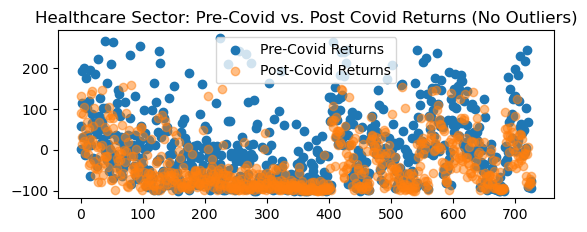

In [58]:
#scatter plot of data without outliers
plt.subplot(2, 1, 1)
plt.scatter(range(len(no_outliers_df['Symbol'])), no_outliers_df['Return from 2017-2019 (Pre-Covid)'], label="Pre-Covid Returns")
plt.scatter(range(len(no_outliers_df['Symbol'])), no_outliers_df['Return from 2020-2022 (Post-Covid)'], label="Post-Covid Returns", alpha = 0.5)
plt.legend()
plt.title('Healthcare Sector: Pre-Covid vs. Post Covid Returns (No Outliers)')
plt.savefig("Healthcare_Scatter_Pre_vs_Post_No_Outliers.png")

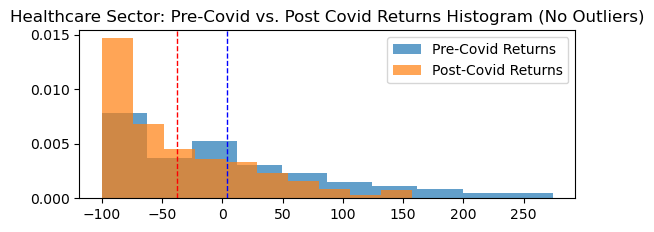

In [59]:
#plotting a histogram of data without outliers
plt.subplot(2, 1, 2)
plt.hist(no_outliers_df['Return from 2017-2019 (Pre-Covid)'], 10, density=True, alpha=0.7, label="Pre-Covid Returns")
plt.hist(no_outliers_df['Return from 2020-2022 (Post-Covid)'], 10, density=True, alpha=0.7, label="Post-Covid Returns")
plt.axvline(no_outliers_df['Return from 2017-2019 (Pre-Covid)'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(no_outliers_df['Return from 2020-2022 (Post-Covid)'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.legend()  
plt.title('Healthcare Sector: Pre-Covid vs. Post Covid Returns Histogram (No Outliers)')
plt.savefig("Healthcare_Histogram_Pre_vs_Post_No_Outliers.png")

###### Histogram shows that data is positively skewed

###### Null Hypothesis: µ(returns of healthcare precovid) = µ(returns of healthcare post covid)


###### Alternative Hypothesis: µ(returns of healthcare precovid) ≠ µ(returns of healthcare post covid)

In [60]:
#running a two-sample t-test on the data without outliers
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(no_outliers_df['Return from 2017-2019 (Pre-Covid)'], no_outliers_df['Return from 2020-2022 (Post-Covid)'], equal_var=False)

Ttest_indResult(statistic=10.426609499942277, pvalue=1.7037579766095215e-24)

###### The p value is ~0.00 which is significant at every level, therefore we can reject the null. The results imply that COVID-19 had a negative impact on the returns of healthcare sector.